# Import Packages

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.activations import relu, linear
from keras.losses import SparseCategoricalCrossentropy
from keras .optimizers import Adam
from keras.regularizers import L2
from utils import gen_data, lin_model

# Evaluating a learning algorithm

Splitting the data set 

In [66]:
X, y, x_ideal, y_ideal = gen_data(18, 2, 0.7)
print(f"x.shape {X.shape},y.shape {y.shape}")

# split data using sklearn routine
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

x.shape (18,),y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


Plot train, Test sets

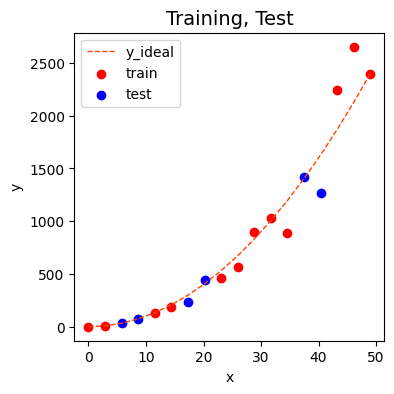

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(x_ideal, y_ideal, "--", color="orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test,   color="blue",   label="test")
ax.legend(loc='upper left')
plt.show()

Error calculation for model evaluation, linear regression

In [68]:
def eval_mse(y, yhat):
    """
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i = ((yhat[i]-y[i])**2)
        err += err_i

    err = err/(2*m)
    return (err)

Compare performance on training and test data

In [69]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)
print(f"Error on training data = {err_train:0.2f}")

#  predict on test data, find test error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)
print(f"Error on test data = {err_test:0.2f}")

Error on training data = 58.01
Error on test data = 171215.01


In [70]:
# plot predictions over data range
# x = np.linespace(0, int(X.max()), 100)  # predict values for plot
# y_pred = lmodel.predict(x).reshape(-1, 1)

# Bias and Variance

In [71]:
# Generate  data
# X, y, x_ideal, y_ideal = gen_data(40, 5, 0.7)
# print("X.shape", X.shape, "y.shape", y.shape)

# # split the data using sklearn routine
# X_train, X_, y_train, y_ = train_test_split(
#     X, y, test_size=0.50, random_state=1)
# X_cv, X_test, y_cv, y_test = train_test_split(
#     X_, y_, test_size=0.20, random_state=1)
# print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
# print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
# print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

Plot Train, Cross-Validation, Test

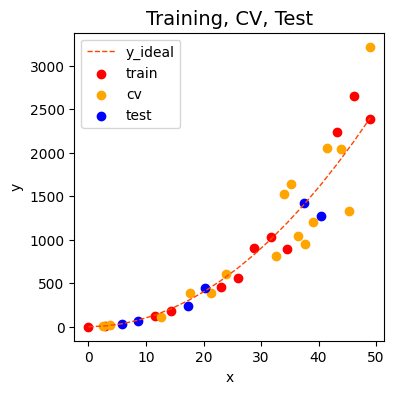

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(x_ideal, y_ideal, "--", color="orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red",           label="train")
ax.scatter(X_cv, y_cv,       color="orange", label="cv")
ax.scatter(X_test, y_test,   color="blue",   label="test")
ax.legend(loc='upper left')
plt.show()

# Neural Network

In [73]:
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(units=120, activation=relu, kernel_regularizer=L2(0.1)),
        Dense(units=40, activation=relu, kernel_regularizer=L2(0.1)),
        Dense(units=6, activation=linear)

    ],
)
model_r.compile(
    optimizer=Adam(0.01),
    loss=SparseCategoricalCrossentropy(from_logits=True)
)

In [74]:
print(f"{X_train[:5]} \n \n {y_train[:5]} ")

[43.23529412 11.52941176  2.88235294 28.82352941  0.        ] 
 
 [2242.65268568  125.51762851    5.55094885  901.24208745    0.        ] 


In [75]:
# model_r.summary()
model_r.fit(
    X_train, y_train,
    epochs=100
)

Epoch 1/100


ValueError: in user code:

    File "/home/dheeraj/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/dheeraj/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/dheeraj/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/dheeraj/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/dheeraj/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/dheeraj/.local/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_10' (type Sequential).
    
    Input 0 of layer "dense_28" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_10' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None
